<strong>Universidade de São Paulo (USP) </strong>\
<strong>Discente</strong>: Carlos Filipe de Castro Lemos \
<strong>Implementação</strong>: Método de Determinação de Raízes - Método da Bisseção \
<strong>Fonte</strong>: https://www.youtube.com/playlist?list=PLomBG50UAP0m9ukqkap2GqlPXOBUq8FaL

In [181]:
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [182]:
def f1(x): 
    return x**3-1

In [183]:
def f2(x):
    return x**3-9*x+3 

In [184]:
def quantidadeIteracoes(a,b,epsilon):
    return math.ceil((math.log(b-a)-math.log(epsilon))/(math.log(2)))

In [185]:
def bissecao(f, a, b, epsilon, maxIter = 50):
    """ 
    Calcula a raiz de uma função f(x) contínua 
    existente em um intervalo [a,b], com erro
    tolerado de epsilon. Caso não convirja, será
    tolerado o máximo de 50 iterações.

    @param(f): função f(x)
    @param(a): limite inferior do intervalo [a,b]
    @param(b): limite superior do intervalo [a,b]
    @param(epsilon): erro tolerado.
    @param(maxIter): máximo de iterações permitidas.
    @retorn: {erro, raiz}:{boolean, number}
    """
    # Contabiliza iterações
    k = 0 
    
    # Variável do gráfico
    runs = []

    # Identifica ponto médio do intervalo
    x = (a+b)/2
    
    # Verifica Teorema dos Sinais
    if f(a)*f(b) > 0: 
        print('Erro: não há garantia de raiz no intervalo')
        return (True, x, runs)
    
    # Verifica se o intervalo está dentro da tolerância de erro
    if abs(b-a) < epsilon: 
        runs.append((k, a, f(a), b, f(b), x, f(x), abs(b-a)))
        return (False, x, runs)

    # Início das Iterações
    # Controle de parada: erro absoluto
    while abs(b-a)>epsilon:
        # Atualiza iterações
        k += 1

        # Atualiza valores iterativos
        if f(a)*f(x) < 0: b = x
        if f(b)*f(x) < 0: a = x
        x = (a+b)/2

        # Atualização de variável do gráfico
        runs.append((k, a, f(a), b, f(b), x, f(x), abs(b-a)))

        # Efetua controle de iterações máximas
        if k == maxIter: 
            print('Erro: Máximo de iterações atingido')
            return (True, x, runs)
    
    # Retorna raiz calculada
    return (False, x, runs)

In [186]:
def graficos(runs):
    
    # Coletando valores para os gráficos
    x = []
    y = []
    intervalos = []
    for r in runs:
        x.append(r[0])
        y.append(r[6])
        intervalos.append(r[7])

    # Plot do primeiro gráfico
    plt.plot(x,y)
    plt.title('Erro Absoluto de Valor da Função em Cada Iteração'.upper())
    plt.show()

    # Plot do segundo gráfico
    plt.plot(x,intervalos)
    plt.title('Tamanho do Intervalo em Cada Iteração'.upper())
    plt.show()

In [187]:
a = -0.25
b = 1.25
epsilon = 0.0001

Raiz: 1.0000152587890625
Iterações Previstas: 14


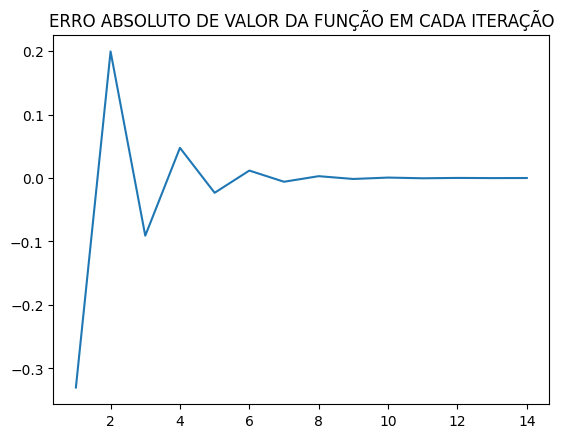

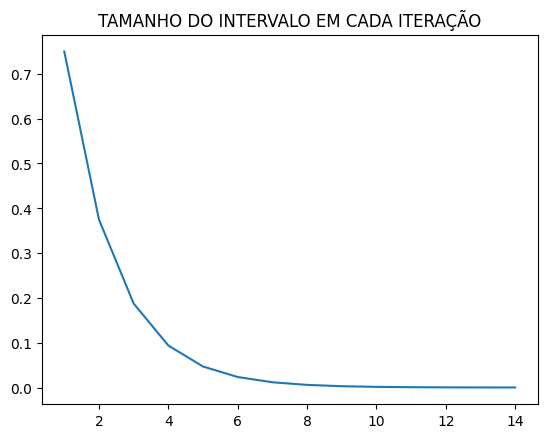

In [188]:
[erro, raiz, runs] = bissecao(f1, a, b, epsilon)
iter = quantidadeIteracoes(a, b, epsilon)
print('Raiz:', 'Erro' if erro else raiz)
print('Iterações Previstas:', iter)
graficos(runs)


In [189]:
a = 0
b = 1
epsilon = 0.001

Raiz: 0.33740234375
Iterações Previstas: 10


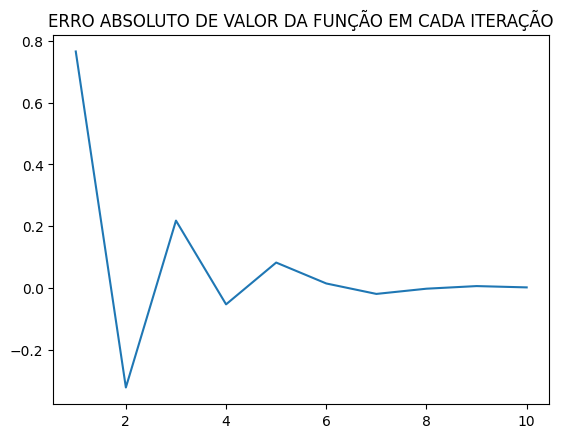

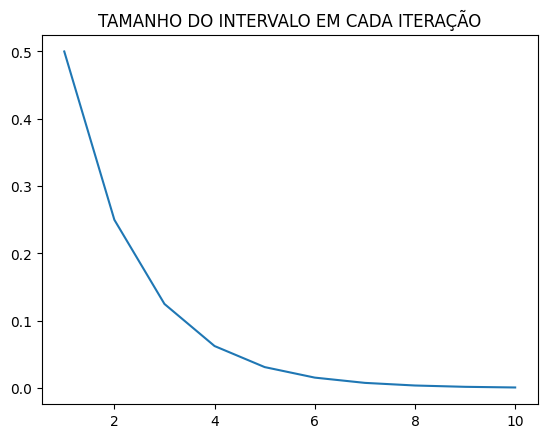

In [190]:
[erro, raiz, runs] = bissecao(f2, a, b, epsilon)
iter = quantidadeIteracoes(a, b, epsilon)
print('Raiz:', 'Erro' if erro else raiz)
print('Iterações Previstas:', iter)
graficos(runs)